# Regresión logística 


Algoritmo de clasificación binaria. Es decir, la tarea de este algoritmo es la de clasificar un conjunto de vectores con dos posibles valores

$$
\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n) \}    ; y_i \in \{0,1\}, x_j \in R^n
$$

La regresión logística es un clasificador **probabilístico** que lidia con problemas de clasificación binaria. Es decir, dado una muestra

$$
({\bf{x}}, y )
$$

Lo que obtenemos del clasificador es una probabilidad de que el vector **x** pertenezca a alguna de las clases 0 o 1.

$$
p = P(y=1 | {\bf{x}})
$$

El supuesto principal de la regresión logística es que el logaritmo de la siguiente relación se describe por una relación lineal. Es por eso que es un clasificador lineal:

$$
\log \left( \frac {p} {1-p} \right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_N = 
<(\beta_0, \beta_1, \ldots, \beta_N),(1, x_0, \ldots, x_N)>
$$

A esta función la podemos encontrar como la función de liga ( o _link function_ ) y es un operador no lineal vamos a usar como modelo para determinar si un punto pertenece a una clase o a otra. De esta relación lo que nosotros necesitamos encontrar es el conjunto de parámetros

$$
{\bf{\beta}} = \{ \beta_0 , \beta_1, \ldots, \beta_n \}
$$

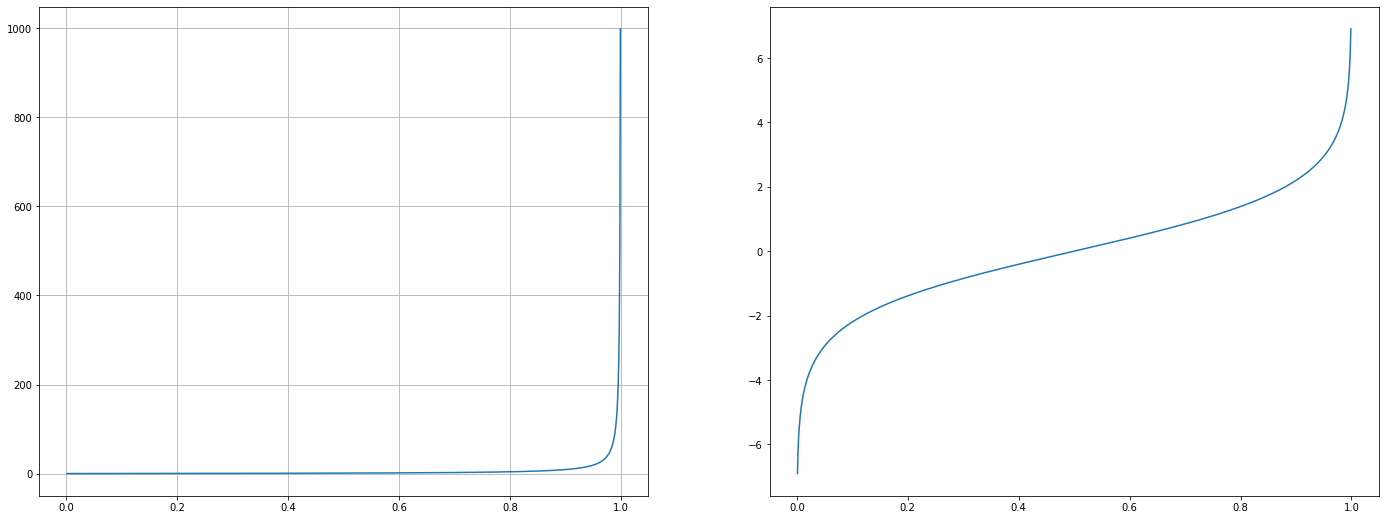

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax = plt.subplots(1,2, figsize=(24,9))
X = np.linspace(0.001,0.999,1000)
#funcion logit
logit = np.log(X/(1-X))

ax[0].plot(X,np.exp(logit))
ax[0].grid()
ax[1].plot(X,logit)
ax[1].grid()
plt.grid()

Como podemos ver cuando 
$$
p = 1-p \Rightarrow p= 0.5
$$

Es el punto en el que es igualmente probable que un punto pertenezca a una clase como a la otra. En la imagen podemos ver que la probabilidad asociada a nuestro modelo es 0.

Es decir, en términos de los puntos y coeficiente que queremos encontrar lo podemos expresar como:

$$
\log \left( \frac{p} {1-p}\right) = {\bf{\beta^T x}} = 0
$$

Esto implica que ${\bf{\beta}}$ es un vector ortogonal a nuestro hiperplano de puntos y es el que va a dividir a los puntos de una clase de la otra. Todos aquellos que queden por encima de ese producto serán de una clase mientras que los que sean menor a ese producto punto pertenecerán a la otra.

Usando las propiedades de los logaritmos podemos encontrar la forma que debe tener $p$.

$$
\begin{array} {ll}
\frac{p} {1-p} &= \exp({\beta^T x}) \\
p & =  (1-p) \exp({\beta^T x}) \\
p(1 + \exp({\beta^T x})) &= \exp({\beta^T x}) \\
p & =  \frac {\exp({\beta^T x}) } {1 + \exp({\beta^T x})}  & = \frac {1} { 1 + \exp(-{\beta^T x})} = \sigma({\beta^T x})
\end{array}
$$

In [27]:
list(zip(xx,np.round(yy)))

[(-4.0, 0.0),
 (-3.9, 0.0),
 (-1.0, 0.0),
 (0.0, 0.0),
 (2.0, 1.0),
 (4.0, 1.0),
 (5.0, 1.0)]

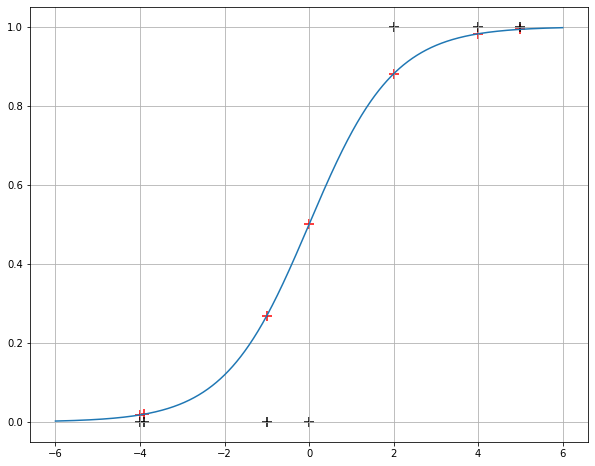

In [28]:
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

xx = np.array([-4, -3.9, -1,0, 2, 4, 5])
yy = sigmoide(xx)

X = np.linspace(-6,6,1000)
Y = sigmoide(X)
fig = plt.figure(1, figsize=(10,8))

plt.scatter(xx,yy, s=100, c='r', marker='+')
plt.scatter(xx,np.round(yy), s=100, c='k', marker='+')

plt.plot(X,Y)
plt.grid()

In [15]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [17]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [16]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,
                  columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
len(cancer.target[cancer.target==0])
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Típicamente en el aprendizaje estadístico, dividimos nuestro conjunto de entrenamiento en dos conjuntos **ajenos**. El conjunto entrenamiento, con el que se encuentran los parámetros de mi algoritmo, y el conjunto de **prueba** con el que se prueba el clasificador. 

Al ser conjuntos ajenos, si al de prueba _le va bien_ (calificación alta) entonces podemos confiar en que los parámetros encontrados son satisfactorios. 

In [24]:
X = df
y = pd.Series(cancer.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=2)


## Logistic Regresion con sklearn

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import confusion_matrix

In [27]:
log_reg_model = LogisticRegression(max_iter=2500,
                                   random_state=42)

# Entrenamiento

log_reg_model.fit(X_train, y_train)

# Predicciones: Esta es la esencia de los modelos de aprendizaje estadístico
# decimos que es predicción porque de alguna forma el algoritmo "infiere" 
# las etiquetas para vectores no vistos

y_pred = log_reg_model.predict(X_test)

# Evaluación de modelo

print("Accuracy:", np.round(accuracy_score(y_test, y_pred), 2))
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred,
                                                               average='binary')
print("Precision:", np.round(precision, 2))
print("Recall:", np.round(recall, 2))
print("F-Score:", np.round(fscore, 2))



Accuracy: 0.93
Precision: 0.94
Recall: 0.94
F-Score: 0.94



Confusion Matrix


Text(33.0, 0.5, 'True')

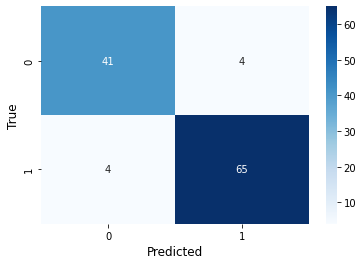

In [28]:
# Matriz de confusión

cf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [31]:
for atrib, coef in zip(df.columns.tolist(), list(np.round(log_reg_model.coef_[0],1))):
    print(f"Atributo {atrib} : {coef} \n")

Atributo mean radius : 0.8 

Atributo mean texture : 0.3 

Atributo mean perimeter : -0.2 

Atributo mean area : 0.0 

Atributo mean smoothness : -0.2 

Atributo mean compactness : -0.2 

Atributo mean concavity : -0.4 

Atributo mean concave points : -0.3 

Atributo mean symmetry : -0.2 

Atributo mean fractal dimension : -0.0 

Atributo radius error : -0.0 

Atributo texture error : 0.7 

Atributo perimeter error : 0.5 

Atributo area error : -0.1 

Atributo smoothness error : -0.0 

Atributo compactness error : 0.1 

Atributo concavity error : -0.0 

Atributo concave points error : -0.0 

Atributo symmetry error : -0.0 

Atributo fractal dimension error : 0.0 

Atributo worst radius : 0.3 

Atributo worst texture : -0.5 

Atributo worst perimeter : -0.2 

Atributo worst area : -0.0 

Atributo worst smoothness : -0.3 

Atributo worst compactness : -0.5 

Atributo worst concavity : -1.1 

Atributo worst concave points : -0.5 

Atributo worst symmetry : -0.3 

Atributo worst fractal di

In [28]:
for val in log_reg_model.coef_[0]:
    print(val," ")

0.8405084245237817  
0.27407009923294334  
-0.2066328013180583  
0.018257600486043433  
-0.16137401242308794  
-0.19456707857734912  
-0.4488925009425909  
-0.2607271768669305  
-0.1846108889958806  
-0.02445705142681131  
-0.037938491178218  
0.706477417973848  
0.4564853615028271  
-0.1010066042111955  
-0.02609073396922876  
0.05047849137677734  
-0.05133841596646652  
-0.03169064040677552  
-0.010260415663159071  
0.010635617398181169  
0.2773414387494108  
-0.4473982837385423  
-0.15338850827290526  
-0.013801675106998663  
-0.33712014300589077  
-0.49766822758789586  
-1.159064345833694  
-0.5019000037178705  
-0.3495458596736614  
-0.0644180049908058  
